<a href="https://colab.research.google.com/github/manjuprashant/ANA-38/blob/main/predictive_maintanence_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train_FD001.csv to train_FD001.csv


In [3]:
import pandas as pd

df = pd.read_csv("train_FD001.csv")   # if file is in same folder
# df = pd.read_csv("../data/raw/train_FD001.csv")  # if using project structure

print(df.head())
print(df.shape)


   engine_id  cycle  setting1  setting2  setting3     s1     s2      s3  \
0          1      1       0.1       0.2       0.3  518.7  641.8  1589.7   
1          1      2       0.1       0.2       0.3  518.7  642.0  1591.1   
2          1      3       0.1       0.2       0.3  518.7  642.2  1592.5   
3          1      4       0.1       0.2       0.3  518.7  642.4  1593.9   
4          1      5       0.1       0.2       0.3  518.7  642.6  1595.3   

       s4     s5  ...      s9  s10   s11    s12     s13     s14  s15   s16  \
0  1400.6  14.62  ...  9054.0  1.3  47.0  521.6  2388.1  8130.0  8.4  0.03   
1  1403.1  14.62  ...  9057.0  1.3  47.0  522.1  2388.2  8131.0  8.4  0.03   
2  1405.6  14.62  ...  9060.0  1.3  47.0  522.6  2388.3  8132.0  8.4  0.03   
3  1408.1  14.62  ...  9063.0  1.3  47.0  523.1  2388.4  8133.0  8.4  0.03   
4  1410.6  14.62  ...  9066.0  1.3  47.0  523.6  2388.5  8134.0  8.4  0.03   

     s17  s18  
0  392.0  125  
1  392.0  124  
2  392.0  123  
3  392.0  122  


In [4]:
df.describe()


,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18
count,10.0,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.00000,10.00000,10.000000,1.000000e+01,...,10.000000,1.000000e+01,10.0,10.000000,10.000000,10.00000,1.000000e+01,1.000000e+01,10.0,10.00000
mean,1.0,5.50000,1.000000e-01,2.000000e-01,3.000000e-01,5.187000e+02,642.70000,1596.00000,1411.850000,1.462000e+01,...,9067.500000,1.300000e+00,47.0,523.850000,2388.550000,8134.50000,8.400000e+00,3.000000e-02,392.0,120.50000
std,0.0,3.02765,1.462847e-17,2.925695e-17,5.851389e-17,1.198364e-13,0.60553,4.23871,7.569126,1.872445e-15,...,9.082951,2.340556e-16,0.0,1.513825,0.302765,3.02765,1.872445e-15,7.314236e-18,0.0,3.02765
min,1.0,1.00000,1.000000e-01,2.000000e-01,3.000000e-01,5.187000e+02,641.80000,1589.70000,1400.600000,1.462000e+01,...,9054.000000,1.300000e+00,47.0,521.600000,2388.100000,8130.00000,8.400000e+00,3.000000e-02,392.0,116.00000
25%,1.0,3.25000,1.000000e-01,2.000000e-01,3.000000e-01,5.187000e+02,642.25000,1592.85000,1406.225000,1.462000e+01,...,9060.750000,1.300000e+00,47.0,522.725000,2388.325000,8132.25000,8.400000e+00,3.000000e-02,392.0,118.25000
50%,1.0,5.50000,1.000000e-01,2.000000e-01,3.000000e-01,5.187000e+02,642.70000,1596.00000,1411.850000,1.462000e+01,...,9067.500000,1.300000e+00,47.0,523.850000,2388.550000,8134.50000,8.400000e+00,3.000000e-02,392.0,120.50000
75%,1.0,7.75000,1.000000e-01,2.000000e-01,3.000000e-01,5.187000e+02,643.15000,1599.15000,1417.475000,1.462000e+01,...,9074.250000,1.300000e+00,47.0,524.975000,2388.775000,8136.75000,8.400000e+00,3.000000e-02,392.0,122.75000
max,1.0,10.00000,1.000000e-01,2.000000e-01,3.000000e-01,5.187000e+02,643.60000,1602.30000,1423.100000,1.462000e+01,...,9081.000000,1.300000e+00,47.0,526.100000,2389.000000,8139.00000,8.400000e+00,3.000000e-02,392.0,125.00000


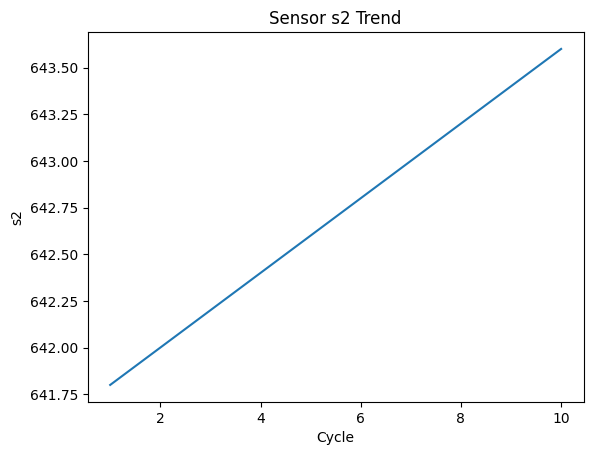

In [5]:
import matplotlib.pyplot as plt

plt.plot(df["cycle"], df["s2"])
plt.title("Sensor s2 Trend")
plt.xlabel("Cycle")
plt.ylabel("s2")
plt.show()


In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

features = ["s2","s3","s4","s7","s11"]
X = df[features].values
y = (df["s18"] < 120).astype(int)   # example failure label

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

def create_sequences(X, y, window=5):
    Xs, ys = [], []
    for i in range(len(X)-window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X, y)

print(X_seq.shape, y_seq.shape)


(5, 5, 5) (5,)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_seq, y_seq, epochs=10, batch_size=8)

model.summary()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.6866
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4000 - loss: 0.6934
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8000 - loss: 0.6659
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8000 - loss: 0.6626
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8000 - loss: 0.6379
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8000 - loss: 0.6338
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8000 - loss: 0.6225
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8000 - loss: 0.6061
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8000 - loss: 0.5941
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8000 - loss: 0.5839


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 64)          │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,109 (355.90 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,740 (237.27 KB)

In [8]:
pred = model.predict(X_seq[:1])
print("Failure probability:", float(pred[0][0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Failure probability: 0.5556073784828186
